In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from random import randint 
import datetime
from env import user, password, host
from env import get_db_url
# from env import host, user, password
# url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [60]:
# Exercises I

# Exercises 1-2
# Run python -m pip install pymysql from your terminal to install pymysql.
# Create a notebook or python script named advanced_dataframes to do your work in for these exercises.
# Run python -m pip install pymysql from your terminal to install the mysql client (any folder is fine)
# cd into your exercises folder for this module and run echo env.py >> .gitignore


In [61]:
# 3. # Create a function named get_db_url. 
# It should accept a username, hostname, password, and database name and return a url connection string formatted 
# like in the example at the start of this lesson.

# def get_db_url(user, password, host, database):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [62]:
# 4. Use your function to obtain a connection to the employees database.
get_db_url(user, password, host, 'employees')
url = get_db_url(user, password, host, 'employees')

In [63]:
# 5. Once you have successfully run a query:

# test_url = get_db_url('employee')
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)


# returns back the following error message
# OperationalError: (1044, "Access denied for user 'kalpana_1823'@'%' to database 'employee'")

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [64]:
# 5b. Intentionally make an error in your SQL query. What does the error message look like?

# pd.read_sql('SELECT * FROM employees LIMT 5 OFFSET 50', url) # "LIMT" instead of "LIMIT" typo

# sql query typo returns back the following error message:
# ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5 OFFSET 50' at line 1")

In [65]:
# 6. Read the employees and titles tables into two separate DataFrames.


employees_table = pd.read_sql('SELECT * FROM employees', url)
employees_table.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [66]:
employees_db_tables = pd.read_sql('SHOW TABLES', url)
titles_table = pd.read_sql('SELECT * FROM titles', url)

titles_table.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [67]:
# 7. How many rows and columns do you have in each DataFrame? Is that what you expected?

employees_table.shape

# 300,024 rows/records
# 6 columns

(300024, 6)

In [68]:
# 7. continued

titles_table.shape

# 443,308 rows/records
# 4 columns


(443308, 4)

In [69]:
# 8. Display the summary statistics for each DataFrame

# notes:
# first, i want to check the type of data that i am working with
# i've noticed that numerical values such as dates are 'object' data types in this table
# i will run 'from datetime import datetime'
# create a copy of the employees table - 
# this is so that I dont hard code any changes to the original datafram and should i need to refer back to it
# i then want to change the column 'date' data type to datetime type
# i want to then return the orginal table and check to see if any discrepancies/error occur

employees_table.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [70]:
employees_table_copy = employees_table.copy()

In [71]:
employees_table_copy = employees_table.copy()
employees_table_copy

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [72]:
# 8. continued 

titles_table.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [73]:
titles_table.dtypes # similar to above where dates are being read as 'object' types

emp_no        int64
title        object
from_date    object
to_date      object
dtype: object

In [74]:
# 9. How many unique titles are in the titles DataFrame?

titles_table.title.unique()
## can also use the 'nunique()' method 

# there are 7 unique title positions

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [75]:
titles_table.title.nunique()

7

In [76]:
# 10. What is the oldest date in the to_date column?
# example: mpg[mpg['manufacturer'] == 'dodge'].sort_values(by=['average_mileage'], ascending=[False])

titles_table.sort_values(by=['to_date']).head()

# where 1985-03-01 is the oldest to_date

,emp_no,title,from_date,to_date
16064,20869,Engineer,1985-02-17,1985-03-01
406358,474918,Engineer,1985-02-10,1985-03-11
346216,434232,Staff,1985-02-26,1985-03-20
35527,34059,Senior Engineer,1985-02-10,1985-03-23
277603,287732,Staff,1985-04-14,1985-04-17


In [77]:
# 11. What is the most recent date in the to_date column?

# not accounting for current roles; denoted as "9999-01-01"
# to_date column data type = 'object'
# will want to create a new boolean column to filter for roles that are current
# i can then sort_values by not_current = 'true' and to_date = in descending ordder
# this should indicate roles that are not current, but that are 'most' current


# where there are 40 records with to_date = '2002-08-01' the most recent employee date
titles_table['current'] = titles_table['to_date'] == datetime.date(9999, 1, 1)
titles_table


,emp_no,title,from_date,to_date,current
0,10001,Senior Engineer,1986-06-26,9999-01-01,True
1,10002,Staff,1996-08-03,9999-01-01,True
2,10003,Senior Engineer,1995-12-03,9999-01-01,True
3,10004,Engineer,1986-12-01,1995-12-01,False
4,10004,Senior Engineer,1995-12-01,9999-01-01,True
...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,False
443304,499997,Senior Engineer,1992-08-29,9999-01-01,True
443305,499998,Senior Staff,1998-12-27,9999-01-01,True
443306,499998,Staff,1993-12-27,1998-12-27,False


In [78]:
titles_table.dtypes

emp_no        int64
title        object
from_date    object
to_date      object
current        bool
dtype: object

In [79]:
titles_table.sort_values(by=['current', 'to_date'], ascending=[True, False])

# where last & most recent title held was '2002-08-01'

,emp_no,title,from_date,to_date,current
15192,20278,Senior Staff,1999-11-04,2002-08-01,False
17375,21763,Staff,1994-08-01,2002-08-01,False
23636,26000,Staff,1997-08-01,2002-08-01,False
67905,55876,Staff,1995-08-01,2002-08-01,False
80193,64174,Engineer,1996-08-01,2002-08-01,False
...,...,...,...,...,...
443300,499995,Engineer,1997-06-02,9999-01-01,True
443302,499996,Senior Engineer,2002-05-13,9999-01-01,True
443304,499997,Senior Engineer,1992-08-29,9999-01-01,True
443305,499998,Senior Staff,1998-12-27,9999-01-01,True


In [80]:
# i want to also include a column for the total number of years held in this role
# datetime has a function called 'timedelta'

titles_table[titles_table['to_date'] == datetime.date(2002, 8, 1)].sort_values(by='from_date')

,emp_no,title,from_date,to_date,current
154568,204324,Technique Leader,1985-02-10,2002-08-01,False
209437,241571,Senior Engineer,1990-01-05,2002-08-01,False
339121,429386,Senior Staff,1990-02-03,2002-08-01,False
364701,446732,Senior Engineer,1992-11-10,2002-08-01,False
203061,237207,Engineer,1993-08-01,2002-08-01,False
235813,259430,Engineer,1993-08-01,2002-08-01,False
164220,210868,Engineer,1993-08-01,2002-08-01,False
291839,297339,Staff,1993-08-01,2002-08-01,False
373713,452819,Engineer,1993-08-01,2002-08-01,False
304108,405703,Engineer,1994-08-01,2002-08-01,False


In [81]:
previous_roles = titles_table[titles_table['current'] == False]
previous_roles

,emp_no,title,from_date,to_date,current
3,10004,Engineer,1986-12-01,1995-12-01,False
6,10005,Staff,1989-09-12,1996-09-12,False
9,10007,Staff,1989-02-10,1996-02-11,False
10,10008,Assistant Engineer,1998-03-11,2000-07-31,False
11,10009,Assistant Engineer,1985-02-18,1990-02-18,False
...,...,...,...,...,...
443297,499992,Staff,1987-05-10,1992-05-09,False
443299,499994,Engineer,1993-02-22,1993-10-27,False
443301,499996,Engineer,1996-05-13,2002-05-13,False
443303,499997,Engineer,1987-08-30,1992-08-29,False


In [82]:
last_and_most_recent = previous_roles[['to_date']].sort_values(by='to_date', ascending=False)
last_and_most_recent[last_and_most_recent['to_date'] == datetime.date(2002, 8, 1)].value_counts()

# there are 40 records with to_date = '2002-08-01'

to_date   
2002-08-01    40
dtype: int64

In [83]:
# Exercise Part 2

In [84]:
# 1. Copy the users and roles DataFrames from the examples above.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})


In [85]:
# 2. What is the result of using a right join on the DataFrames?

user_roles = users.merge(roles, left_on='role_id', right_on='id', how='right')
user_roles

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [86]:
user_roles = user_roles.drop(columns='role_id') # removing the 'role_id' column since it is 1. float data type and 2. is also reflected in the joined table 'role_id'

In [87]:
user_roles

,id_x,name_x,id_y,name_y
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


In [88]:
user_roles = user_roles.rename(columns={'name_x': 'user_name', 'id_x': 'name_id', 'id_y': 'role_id', 'name_y': 'role'})
user_roles

,name_id,user_name,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


In [89]:
user_roles.dtypes

name_id      float64
user_name     object
role_id        int64
role          object
dtype: object

In [90]:
# 3. What is the result of using an outer join on the DataFrames?

# it produces a one-for-one match where the role_id (left table) matches the id (right table) and brings over any right table remaining ids/values

users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [91]:
# 4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

users.merge(roles, left_on='id', right_on='id', how='inner', indicator=True)

,id,name_x,role_id,name_y,_merge
0,1,bob,1.0,admin,both
1,2,joe,2.0,author,both
2,3,sally,3.0,reviewer,both
3,4,adam,3.0,commenter,both


In [92]:
# 5. Load the mpg dataset from PyDataset

from pydataset import data
mpg = data('mpg', show_doc=True)



mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [93]:
# 6. Output and read the documentation for the mpg dataset

# what is meant by read the mpg dataset?

mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [94]:
# 7. How many rows and columns are in the dataset?

# 234 rows
# 11 columns

mpg.shape

(234, 11)

In [95]:
# 8. Check out your column names and perform any cleanup you may want on them.

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [96]:
mpg = mpg.rename(columns={'drv': 'drivetrain', 'cty': 'city_miles', 'hwy': 'hwy_miles', 'engine_ltrs': 'engine_liters', 'cyl': 'cylinders'})
mpg

,manufacturer,model,displ,year,cylinders,trans,drivetrain,city_miles,hwy_miles,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [97]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cylinders         int64
trans            object
drivetrain       object
city_miles        int64
hwy_miles         int64
fl               object
class            object
dtype: object

In [98]:
# 9. Display the summary statistics for the dataset

mpg.describe()

,displ,year,cylinders,city_miles,hwy_miles
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [99]:
# 10. How many different manufacturers are there?

# there 15 unique manufacturers in the mpg-dataset
len(mpg.manufacturer.unique())


15

In [100]:
# 11. How many different models are there?

# there are 38 unique vehicle model types 

len(mpg.model.unique())

38

In [101]:
# 12. Create a column named mileage_difference like you did in the DataFrames exercises; 
# this column should contain the difference between highway and city mileage for each car

mpg['mileage_difference (hwy-city)'] = mpg.hwy_miles - mpg.city_miles
mpg

,manufacturer,model,displ,year,cylinders,trans,drivetrain,city_miles,hwy_miles,fl,class,mileage_difference (hwy-city)
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


In [102]:
mpg['average_mileage'] = (mpg.city_miles + mpg.hwy_miles) / 2
mpg

,manufacturer,model,displ,year,cylinders,trans,drivetrain,city_miles,hwy_miles,fl,class,mileage_difference (hwy-city),average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


In [103]:
# 13. Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage

mpg[['city_miles', 'hwy_miles']].agg(['mean']) # aggregating all vehicle city and hwy mileage


,city_miles,hwy_miles
mean,16.858974,23.440171


In [104]:
# 14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

mpg['is_automatic'] = mpg['trans'].str.contains('auto') == True
mpg

,manufacturer,model,displ,year,cylinders,trans,drivetrain,city_miles,hwy_miles,fl,class,mileage_difference (hwy-city),average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [105]:
# 15. Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

mpg.groupby('manufacturer').average_mileage.mean().nlargest(n=1, keep='all')


manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [106]:
# 16. Do automatic or manual cars have better miles per gallon?

# manual cars have a better average mileage by ~3mpg

mpg.groupby('is_automatic').average_mileage.mean()

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

In [107]:
# Exercises Part 3

# 1. Use your get_db_url function to help you explore the data from the chipotle database.

url2 = get_db_url(user, password, host, 'chipotle')
chipotle_table = pd.read_sql('SELECT * FROM orders', url2)
chipotle_table

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [108]:
chipotle_table.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [109]:
# 2. What is the total price for each order?

# i want to take the 'item_name', 'quantity', and 'item_price'
# i can run a 'crosstab' to get the items and calculate total quantity and price?


In [110]:
# 2.continued
chipotle_table.order_id.nunique()

1834

In [111]:
# 2.continued

chipotle_table.dtypes # i see here that item_price is an object type, so i will want to 1. clean the data - removing '$' and 2. convert this to float type in order to sum

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [112]:
# 2.continued

chipotle_table.item_price = chipotle_table.item_price.str.replace('$', '')
chipotle_table

/var/folders/rh/x31f4b0x1p983mw3qx5b0zsh0000gn/T/ipykernel_23687/2220307585.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_table.item_price = chipotle_table.item_price.str.replace('$', '')


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [113]:
# 2.continued

chipotle_table.item_price =chipotle_table.item_price.astype('float')
chipotle_table.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [114]:
# 2.continued

# now we can run a pivot_table with order_id as the index (order_id) and the sum of order_id price as the column

order_total = pd.pivot_table(chipotle_table, values=['item_price'], index=['order_id'], aggfunc='sum')
order_total = order_total.rename(columns={'item_price': 'total_bill_price'})
order_total

,total_bill_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


<AxesSubplot:xlabel='item_name'>

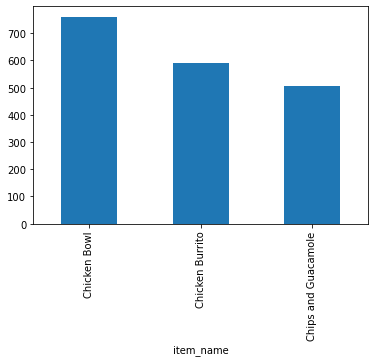

In [115]:
# 3. What are the most popular 3 items?

# top three (3) most popular items include:
# Chicken Bowl           761
# Chicken Burrito        591
# Chips and Guacamole    506

top_3_most_ordered = chipotle_table.groupby('item_name').quantity.agg('sum').nlargest(n=3, keep='all')
top_3_most_ordered.plot(kind='bar')

In [116]:
chipotle_table.groupby('item_name').quantity.sum().sort_values(ascending=False)

# you can use the '.agg()' method to conduct more than 1 operation (i.e., mean of sum)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [117]:
# 4. Which item has produced the most revenue?

# 	            total_revenue
# item_name	
# Chicken Bowl	    7342.73
# Chicken Burrito	5575.82
# Steak Burrito	    3851.43

# notes:
# i want to figure out the total unique 'items'
# i want to calculate the item 'individual price'
# i want to also calculate the total number that each item was purchase * it's individual price
# then, group the items together and return their sum 

chipotle_copy = chipotle_table.copy()
chipotle_copy

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [118]:
# there are 50 unique items
chipotle_copy.item_name.nunique()

50

In [119]:
# from the 50 unique items, i want to...
# pull the 'item_price' where the order_id is = 1

chipotle_copy['individual_item_price'] = np.where(chipotle_table.order_id == 1, True, False)
chipotle_copy.head()

,id,order_id,quantity,item_name,choice_description,item_price,individual_item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,True
1,2,1,1,Izze,[Clementine],3.39,True
2,3,1,1,Nantucket Nectar,[Apple],3.39,True
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,True
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,False


In [120]:
revenue_table = pd.pivot_table(chipotle_table, index=['item_name'], values=['item_price'], aggfunc='sum')
revenue_table = revenue_table.rename(index={'item_name': 'menu_item'}, columns={'item_price': 'total_revenue'})
revenue_table.nlargest(columns='total_revenue', n=3, keep='all')

,total_revenue
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43


In [121]:
# 5. Join the employees and titles DataFrames together

employees_db_tables.head()
titles_table.head()
# employees_table.head()

,emp_no,title,from_date,to_date,current
0,10001,Senior Engineer,1986-06-26,9999-01-01,True
1,10002,Staff,1996-08-03,9999-01-01,True
2,10003,Senior Engineer,1995-12-03,9999-01-01,True
3,10004,Engineer,1986-12-01,1995-12-01,False
4,10004,Senior Engineer,1995-12-01,9999-01-01,True


In [122]:
# users.merge(roles, left_on='role_id', right_on='id', how='right')

employees_and_titles = employees_table.merge(titles_table, on='emp_no')
employees_and_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,current
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,True
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,True
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,True
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,False
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,True


In [123]:
employees_and_titles.title.nunique()

# there are 7 unique employee roles in the company/table

7

In [124]:
# 6. For each title, find the hire date of the employee 
# that was hired most recently with that title

# title
# Assistant Engineer    2000-02-01
# Engineer              2002-08-01
# Manager               1996-08-30
# Senior Engineer       2002-08-01
# Senior Staff          2002-08-01
# Staff                 2000-02-01
# Technique Leader      2000-02-01
# Name: from_date, dtype: object

df3 = employees_and_titles.groupby('title').from_date.agg('max')
df3

title
Assistant Engineer    2000-02-01
Engineer              2002-08-01
Manager               1996-08-30
Senior Engineer       2002-08-01
Senior Staff          2002-08-01
Staff                 2000-02-01
Technique Leader      2000-02-01
Name: from_date, dtype: object

In [125]:
# 7. Write the code necessary to create a cross tabulation of the number of titles by department
# (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

#notes

# reference departments table
# emp_no may correspond with employees within ea. deparment
# join these tables together
# if employee to_date in department table != present day, then they should not be included in the aggregate sum total
# rows = department
# columns = roles
# count total number of unique roles within ea. deparment

employees_db_tables = pd.read_sql('SHOW TABLES', url)
employees_db_tables


,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [126]:
departments_db = pd.read_sql('SELECT * FROM departments', url)
departments_db.head()

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [127]:
dept_emp_db = pd.read_sql('SELECT * FROM dept_emp', url)
dept_emp_db.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [128]:
employees_and_titles.head()
df4 = employees_and_titles.merge(dept_emp_db, on='emp_no')
df5 = df4.merge(departments_db, on='dept_no')
df5.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,current,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,True,d005,1986-06-26,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,1990-08-05,9999-01-01,True,d005,1990-08-05,9999-01-01,Development
2,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,Assistant Engineer,1998-03-11,2000-07-31,False,d005,1998-03-11,2000-07-31,Development
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,Engineer,1992-12-18,2000-12-18,False,d005,1992-12-18,9999-01-01,Development
4,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,Senior Engineer,2000-12-18,9999-01-01,True,d005,1992-12-18,9999-01-01,Development


In [129]:
df5.groupby('to_date_y')
df5

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,current,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,True,d005,1986-06-26,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,1990-08-05,9999-01-01,True,d005,1990-08-05,9999-01-01,Development
2,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,Assistant Engineer,1998-03-11,2000-07-31,False,d005,1998-03-11,2000-07-31,Development
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,Engineer,1992-12-18,2000-12-18,False,d005,1992-12-18,9999-01-01,Development
4,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,Senior Engineer,2000-12-18,9999-01-01,True,d005,1992-12-18,9999-01-01,Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489898,499975,1952-11-09,Masali,Chorvat,M,1992-01-23,Staff,1995-11-21,1997-07-23,False,d002,1996-10-19,1997-07-23,Finance
489899,499977,1956-06-05,Martial,Weisert,F,1996-09-17,Staff,1999-12-28,9999-01-01,True,d002,1999-12-28,9999-01-01,Finance
489900,499989,1954-05-26,Keiichiro,Lindqvist,M,1993-10-28,Senior Staff,1996-10-29,2001-03-07,False,d002,1996-10-29,2001-03-07,Finance
489901,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,True,d002,1993-12-27,9999-01-01,Finance


In [130]:
df6 = df5.loc[:, ~df5.columns.isin(['from_date_x', 'to_date_x'])]
df6['current_dept'] = df6['to_date_y'] == datetime.date(9999, 1, 1)
df7 = df6[df6['current_dept'] == True]
df7.shape

/var/folders/rh/x31f4b0x1p983mw3qx5b0zsh0000gn/T/ipykernel_23687/3441706637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['current_dept'] = df6['to_date_y'] == datetime.date(9999, 1, 1)


(371243, 13)

In [131]:
df7 = df7.rename(columns={'dept_name': 'Department', 'title': 'Title'})
pd.crosstab(df7.Department, df7.Title, margins=True)

Title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
Department,,,,,,,,
Customer Service,240,1927,4,1790,11271,11836,241,27309
Development,5551,42111,2,38816,1085,1123,5478,94166
Finance,0,0,2,0,9546,9995,0,19543
Human Resources,0,0,2,0,9825,10407,0,20234
Marketing,0,0,2,0,11291,11885,0,23178
Production,4670,36308,4,33627,1123,1185,4724,81641
Quality Management,1280,10174,4,9459,0,0,1295,22212
Research,316,2416,2,2250,9093,9646,321,24044
Sales,0,0,2,0,28797,30117,0,58916


In [132]:
pd.crosstab(df7.Department, df7.Title, margins=True, normalize=True).round(2)

Title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
Department,,,,,,,,
Customer Service,0.00,0.01,0.0,0.00,0.03,0.03,0.00,0.07
Development,0.01,0.11,0.0,0.10,0.00,0.00,0.01,0.25
Finance,0.00,0.00,0.0,0.00,0.03,0.03,0.00,0.05
Human Resources,0.00,0.00,0.0,0.00,0.03,0.03,0.00,0.05
Marketing,0.00,0.00,0.0,0.00,0.03,0.03,0.00,0.06
Production,0.01,0.10,0.0,0.09,0.00,0.00,0.01,0.22
Quality Management,0.00,0.03,0.0,0.03,0.00,0.00,0.00,0.06
Research,0.00,0.01,0.0,0.01,0.02,0.03,0.00,0.06
Sales,0.00,0.00,0.0,0.00,0.08,0.08,0.00,0.16
